Definimos los factores, en este caso, los niveles de las máquinas se repiten dos veces.

In [1]:
#Para 2 factores aleatorios
dia <- rep(c(1,2,3,4), each=8)
maquina <- rep(rep(c(1,2,3,4),each=2),4)

Declaramos a los factores como categóricos:

In [3]:
dia <- as.factor(dia)
maquina <- as.factor(maquina)

Definimos a la variable respuesta:

In [4]:
y <- c(142.3,144.0,148.6,146.9,142.9,147.4,133.8,133.2,
       134.9,146.3,145.2,146.3,125.9,127.6,108.9,107.5,
       148.6,156.5,148.6,153.1,135.5,138.9,132.1,149.7,
       152.0,151.4,149.7,152.0,142.9,142.3,141.7,141.2)

Generamos con GAD la tabla de ANOVA:

In [ ]:
library(GAD)

In [6]:
rdia <- as.random(dia)

In [7]:
rmaquina <- as.random(maquina)

Se espera que haya interacción entre los factores, por eso en el modelo se ponen como una multiplicación.

In [8]:
modelo <- lm(y~rdia*rmaquina)

In [9]:
gad(modelo) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
rdia,3,1334.4634,444.82115,5.093143,0.024801972
rmaquina,3,1647.2784,549.09281,6.287040,0.013724497
rdia:rmaquina,9,786.0353,87.33726,4.880454,0.002935774
Residual,16,286.3250,17.89531,NA,NA


Vemos que a segundo nivel (día/máquina) $p < 0.05$, por lo que la interacción entre el día y la máquina sí es significativa, así que no hay una máquina que sea peor que otra, ya que su eficacia depende del lote de los reactivos que se están usando.

## Estimando componentes de la varianza:

In [ ]:
library(lme4)

Esta es la sintaxis cuando vamos a indicar que hay interacción entre los factores:

In [11]:
mod1 <- lmer(y ~ 1 + (1|dia) + (1|maquina) + (1|dia:maquina))
summary(mod1)

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ 1 + (1 | dia) + (1 | maquina) + (1 | dia:maquina)

REML criterion at convergence: 215

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.84283 -0.35581  0.03485  0.20700  2.31766 

Random effects:
 Groups      Name        Variance Std.Dev.
 dia:maquina (Intercept) 34.72    5.892   
 maquina     (Intercept) 57.72    7.597   
 dia         (Intercept) 44.69    6.685   
 Residual                17.90    4.230   
Number of obs: 32, groups:  dia:maquina, 16; maquina, 4; dia, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)  141.184      5.323   26.52

In [44]:
summ_mod1$var

 Groups      Name        Std.Dev.
 dia:maquina (Intercept) 5.8925  
 maquina     (Intercept) 7.5972  
 dia         (Intercept) 6.6849  
 Residual                4.2303  

In [52]:
summ_mod1$varcor[1]

,(Intercept)
(Intercept),34.72108


In [53]:
summ_mod1 <- summary(mod1)
vars <- c(summ_mod1$varcor[1],summ_mod1$varcor[2],summ_mod1$varcor[3],summ_mod1$varcor[4])

In [67]:
length(summ_mod1$var)

[1] 3

In [63]:
lapply(summ_mod1$var,as.double)

$`dia:maquina`
[1] 34.72108

$maquina
[1] 57.71818

$dia
[1] 44.6885

La variación de la interacción día/máquina es casi dos veces mayor que la variación de los residuos.

In [46]:
#Componentes de varianza
vars <- c(34.72,57.72,44.69,17.90)

In [49]:
#para sacar porcentajes
porcentajes<-100*vars/sum(vars)
porcentajes <- c(round(porcentajes[1],2),round(porcentajes[2],2),round(porcentajes[3],2),round(porcentajes[4],2))

In [50]:
porcentajes

[1] 22.40 37.23 28.83 11.55

Gráfico de pastel

In [48]:
library(plotrix)

Warning message in plot.window(...):
“"clockwise" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"clockwise" is not a graphical parameter”
Warning message in title(...):
“"clockwise" is not a graphical parameter”


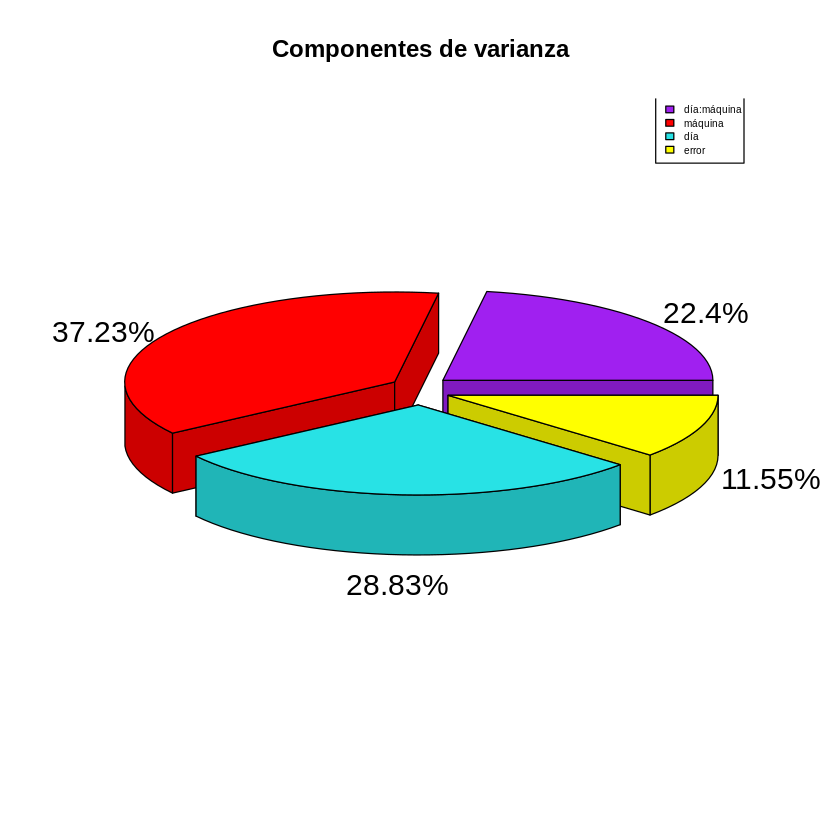

In [68]:
etiqueta<-paste(porcentajes,"%",sep = "")
colores<-c("purple","red","541","yellow")

pie3D(porcentajes,labels = etiqueta,radius=0.9,explode=0.1,main="Componentes de varianza",clockwise=TRUE,col=colores)

#Leyenda
legend("topright",c("día:máquina","máquina","día","error"),cex=0.5,fill=colores)

Lo que aporta mayor variación es la máquina.

## Verificando los supuestos del modelo 

Normalidad de los residuos:

In [80]:
residuos<-modelo$res
residuos

1     2     3     4     5     6     7     8     9    10    11    12    13 
-0.85  0.85  0.85 -0.85 -2.25  2.25  0.30 -0.30 -5.70  5.70 -0.55  0.55 -0.85 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 0.85  0.70 -0.70 -3.95  3.95 -2.25  2.25 -1.70  1.70 -8.80  8.80  0.30 -0.30 
   27    28    29    30    31    32 
-1.15  1.15  0.30 -0.30  0.25 -0.25

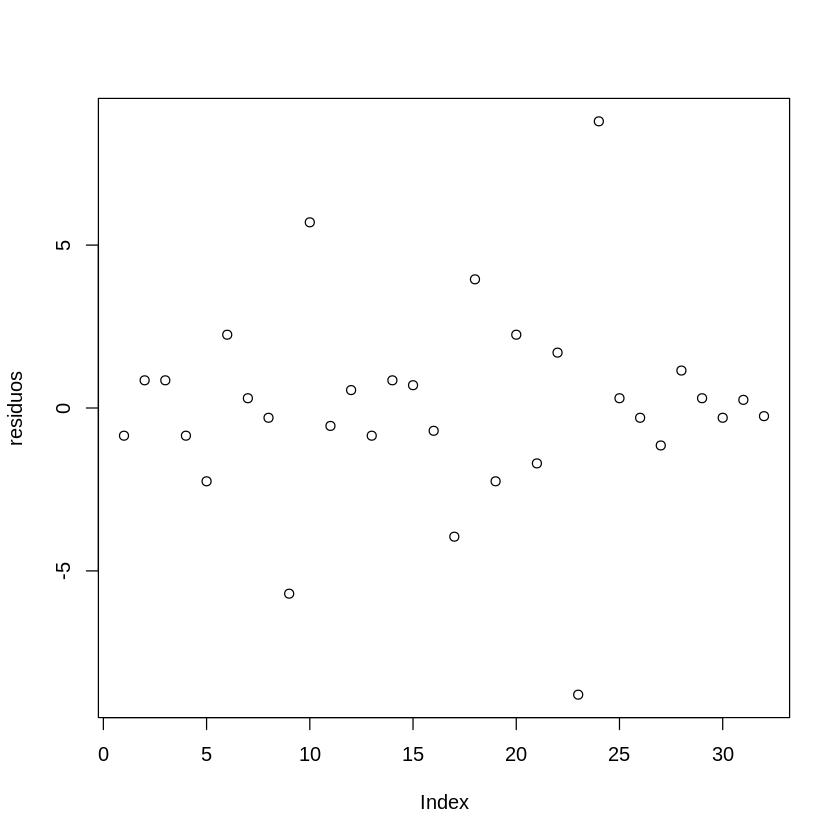

In [81]:
plot(residuos)

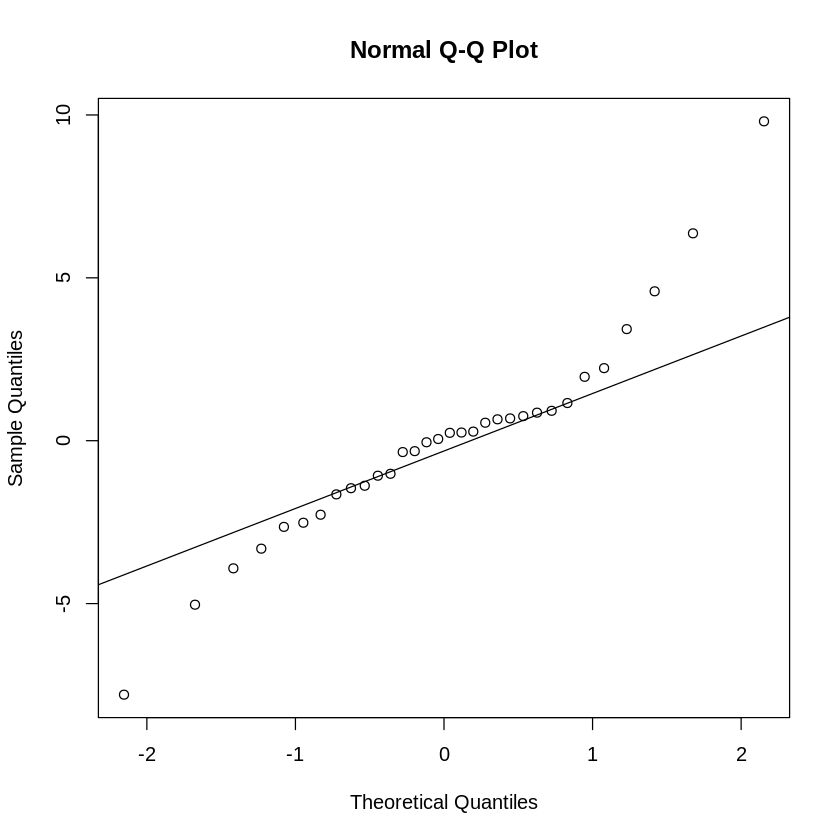

In [71]:
qqnorm(residuos)
qqline(residuos)

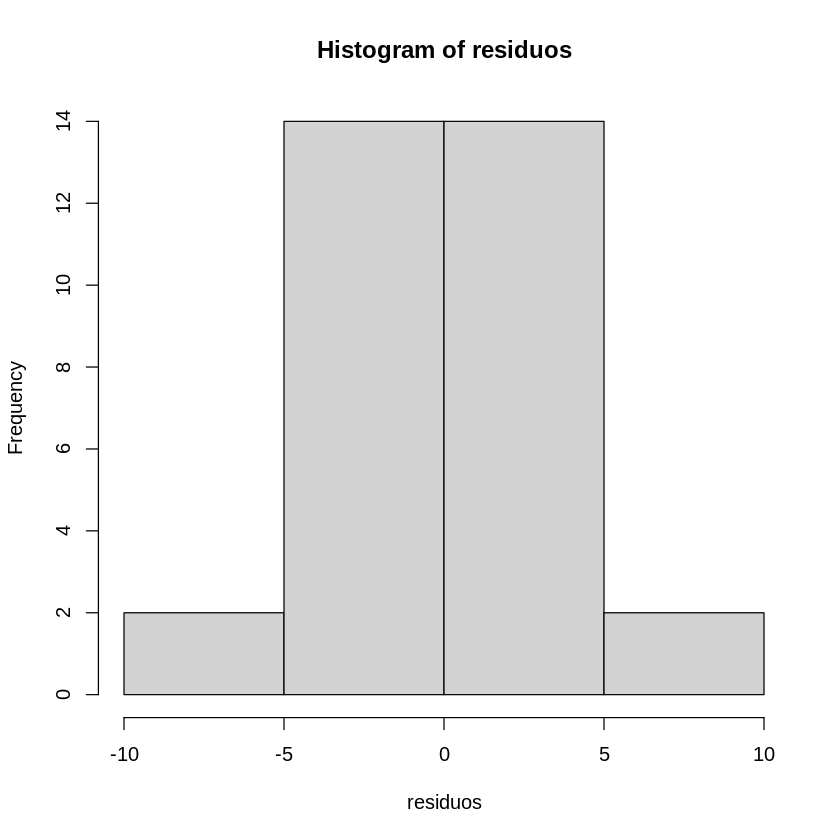

In [82]:
hist(residuos)

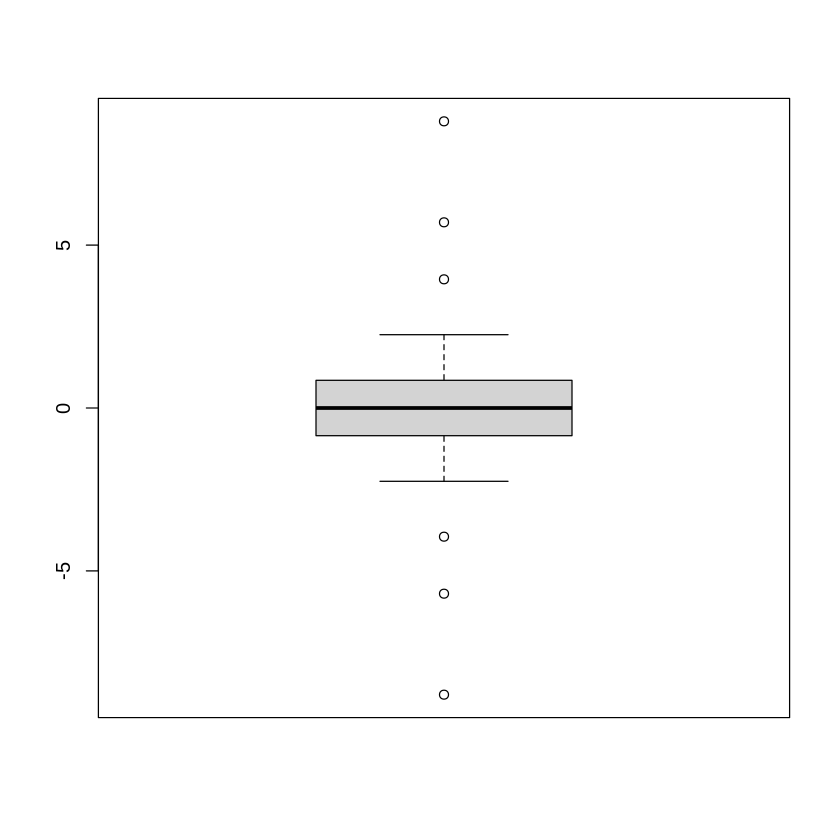

In [83]:
boxplot(residuos)

In [84]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.90151, p-value = 0.00677


Independencia de los residuos:

In [ ]:
library(tseries)

In [76]:
####Ho: No hay correlacion (prueba de rachas, para probar no correlacion de residuos)
runs.test(as.factor(modelo$residual>0))


	Runs Test

data:  as.factor(modelo$residual > 0)
Standard Normal = 2.1564, p-value = 0.03105
alternative hypothesis: two.sided


Ya que no se cumplen los supuestos, es probable que nuestras respuestas no son las adecuadas.